In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('loan.csv')

C:\Users\chung\AppData\Local\Temp\ipykernel_14552\129683778.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [8]:
len(df)

2260668

In [12]:
data = pd.read_csv('from2016.csv')

C:\Users\chung\AppData\Local\Temp\ipykernel_14552\2157091396.py:1: DtypeWarning: Columns (19,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('from2016.csv')


In [24]:
len(data)

420723

In [21]:
print(data['GOOD'].sum()/(data['GOOD'].sum()+data['BAD'].sum()))
print(data['BAD'].sum()/(data['GOOD'].sum()+data['BAD'].sum()))


0.7671365720438388
0.2328634279561612


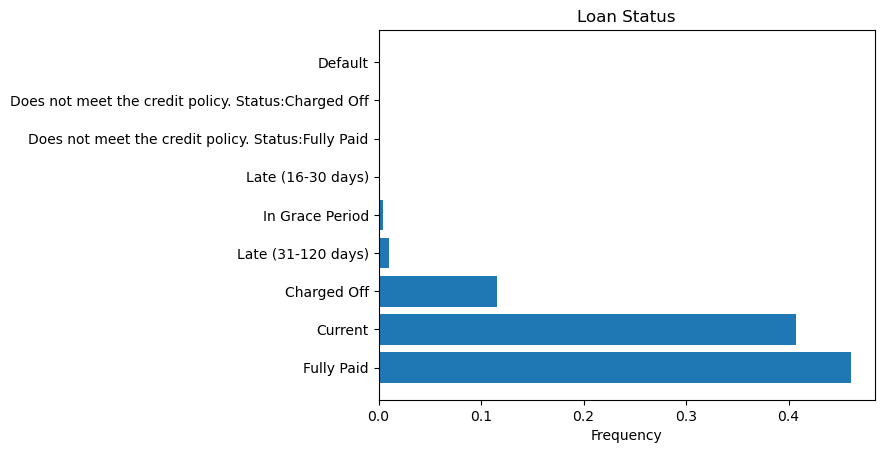

In [11]:
# Tính tần suất của mỗi category
frequency = df['loan_status'].value_counts()

# Vẽ biểu đồ
plt.barh(frequency.index, frequency.values/len(df))  # Sử dụng plt.barh() để vẽ biểu đồ ngang
plt.xlabel('Frequency')
# plt.ylabel('Category')
plt.title('Loan Status')
plt.show();

In [98]:
# Những cột over missing hoặc không có định nghĩa sẽ bị xóa (cột màu đỏ trong excel)
over_mising_columns = ['id', 'member_id','url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog','policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mo_sin_old_il_acct', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq','mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_flag','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term']

In [99]:
df.drop(over_mising_columns, axis=1, inplace = True)

In [100]:
# Drop luôn những biến Lending Club đánh giá hồ sơ
lc_danhgia  = ['grade', 'sub_grade']
df.drop(lc_danhgia, axis = 1, inplace = True)

In [101]:
# drop 2 biến funded_amnt và funded_amnt_inv do có tương quan rất lớn với biến loan_amnt, tức số tiền người đi vay yêu cầu.
relate_loan_amnt= ['funded_amnt', 'funded_amnt_inv']
df.drop(relate_loan_amnt, axis = 1, inplace = True)

In [102]:
# 2 biến: recoveries và collection_recovery_fee: liên quan trực tiếp đến định nghĩa charge_off
relate_target = ['recoveries', 'collection_recovery_fee']
df.drop(relate_target, axis=1, inplace = True)

In [3]:
#các biến thời gian
time_columns = ['earliest_cr_line', 'last_pymnt_d','next_pymnt_d', 'last_credit_pull_d', 'issue_d']


In [104]:
count_a = (df['loan_status'] == 'Fully Paid').sum()
count_a

1041952

In [105]:
df[time_columns].isnull().sum()

earliest_cr_line           29
last_pymnt_d             2426
next_pymnt_d          1303607
last_credit_pull_d         73
issue_d                     0
dtype: int64

In [4]:
# chuyển tất cả các cột thời gian bên trên về định dạng date_time

for i in time_columns:
    df[i] = pd.to_datetime(df[i], format = '%b-%Y')


In [5]:
df[time_columns].max()

earliest_cr_line     2015-11-01
last_pymnt_d         2019-02-01
next_pymnt_d         2019-04-01
last_credit_pull_d   2019-03-01
issue_d              2018-12-01
dtype: datetime64[ns]

In [6]:
df[['earliest_cr_line','issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d', 'loan_status']]

,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,loan_status
0,2001-04-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,Current
1,1987-06-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,Current
2,2011-04-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,Current
3,2006-02-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,Current
4,2000-12-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,Current
...,...,...,...,...,...,...
2260663,2004-01-01,2017-10-01,2019-02-01,2019-03-01,2019-02-01,Current
2260664,2003-03-01,2017-10-01,2018-08-01,NaT,2017-09-01,Fully Paid
2260665,1995-02-01,2017-10-01,2019-02-01,2019-03-01,2019-02-01,Current
2260666,2003-07-01,2017-10-01,2019-02-01,2019-03-01,2019-02-01,Current


In [109]:
# Tạo một đối tượng datetime cho ngày cụ thể (2019-04-01) đây chính là cột next_pymnt_d
reference_date = pd.to_datetime('2019-04-01')

# Tính toán số tháng đến ngày tham chiếu
for i in time_columns:
    df[i] = (reference_date-df[i])/(np.timedelta64(1, 'M'))
df[time_columns]

,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue_d
0,212.064516,1.903226,1.0,1.903226,3.903226
1,375.064516,1.903226,1.0,1.903226,3.903226
2,94.258065,1.903226,1.0,1.903226,3.903226
3,155.064516,1.903226,1.0,1.903226,3.903226
4,215.967742,1.903226,1.0,1.903226,3.903226
...,...,...,...,...,...
2260663,179.645161,1.903226,1.0,1.903226,17.645161
2260664,189.516129,7.838710,NaN,18.612903,17.645161
2260665,284.677419,1.903226,1.0,1.903226,17.645161
2260666,185.580645,1.903226,1.0,1.903226,17.645161


In [110]:
# Xóa 3 cột last_pymnt_d, next_pymnt_d và last_credit_pull_d
df.drop(['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis = 1, inplace = True)


In [111]:
time_columns = ['earliest_cr_line', 'issue_d']

In [113]:
# Định nghĩa hàm lambda để làm tròn lên và xử lý giá trị null
round_up = lambda x: np.ceil(x) if pd.notnull(x) else np.nan
for i in time_columns:
    # Áp dụng hàm lambda cho từng cột float trong DataFrame
    df[i] = df[i].apply(round_up)
df[time_columns]


,earliest_cr_line,issue_d
0,213.0,4.0
1,376.0,4.0
2,95.0,4.0
3,156.0,4.0
4,216.0,4.0
...,...,...
2260663,180.0,18.0
2260664,190.0,18.0
2260665,285.0,18.0
2260666,186.0,18.0


In [114]:
df[time_columns].isnull().sum()

earliest_cr_line    29
issue_d              0
dtype: int64

In [116]:
for i in df.columns:
    print(i)

loan_amnt
term
int_rate
installment
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
last_pymnt_amnt
collections_12_mths_ex_med
application_type
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120d

In [117]:
#biens nay co qua nhieu gia tri unique
df.drop(['emp_title'], axis = 1, inplace = True)

In [118]:
#biens nay co qua nhieu gia tri unique
df.drop(['title'], axis = 1, inplace = True)

In [119]:
#biens nay co qua nhieu gia tri unique
df.drop(['zip_code'], axis = 1, inplace = True)

In [120]:
print(f'This dataset contains of {df.shape[0]} rows and {df.shape} columns')

This dataset contains of 2260668 rows and (2260668, 85) columns


In [122]:
for i in df.columns:
    print(i)

loan_amnt
term
int_rate
installment
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
last_pymnt_amnt
collections_12_mths_ex_med
application_type
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl

In [123]:
# Set option max columns display
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [124]:
# show info
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,loan_amnt,int64,0,0.000000,1572,"[2500, 30000, 5000, 4000]"
1,term,object,0,0.000000,2,"[ 36 months, 60 months]"
2,int_rate,float64,0,0.000000,673,"[13.56, 18.94, 17.97, 16.14]"
3,installment,float64,0,0.000000,93296,"[84.92, 777.23, 180.69, 146.51]"
4,emp_length,object,146907,6.498389,11,"[10+ years, 6 years, 4 years, < 1 year]"
5,home_ownership,object,0,0.000000,6,"[RENT, MORTGAGE, OWN, ANY]"
6,annual_inc,float64,4,0.000177,89368,"[55000.0, 90000.0, 59280.0, 92000.0]"
7,verification_status,object,0,0.000000,3,"[Not Verified, Source Verified, Verified]"
8,issue_d,float64,0,0.000000,137,"[4.0, 5.0, 6.0, 7.0]"
9,loan_status,object,0,0.000000,9,"[Current, Fully Paid, Late (31-120 days), In G..."


In [133]:

df['loan_status'].value_counts()

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

In [135]:
df.shape

(2260668, 85)

In [7]:
# Lọc dữ liệu. Chỉ giữ lại các cột có loan_status bằng Fully Paid hoặc Charged Off và gán vào 1 dataframe mới tên data
data = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [9]:
#in ra số lượng dữ liệu sau khi lọc
data.shape

(1303607, 145)

In [10]:
# Thêm 1 cột Good, trong đó Fully Paid là 1 và Charged Off là 0.
# make a good_loan list
good_loan = ['Fully Paid']

# categorizing whether its a good loan or bad loan
data['loan_status'] = np.where(data['loan_status'].isin(good_loan), 1, 0)
data['loan_status'].value_counts()/len(data)*100



C:\Users\chung\AppData\Local\Temp\ipykernel_16200\4093888917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_status'] = np.where(data['loan_status'].isin(good_loan), 1, 0)


loan_status
1    79.928383
0    20.071617
Name: count, dtype: float64

In [11]:
# Thêm 1 cột Good, trong đó Fully Paid là 1 và Charged Off là 0.
data['GOOD'] = data['loan_status']
data['BAD'] = 1 - data['loan_status']
data.drop(['loan_status'], axis = 1, inplace = True)


C:\Users\chung\AppData\Local\Temp\ipykernel_16200\1449208242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GOOD'] = data['loan_status']
C:\Users\chung\AppData\Local\Temp\ipykernel_16200\1449208242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BAD'] = 1 - data['loan_status']
C:\Users\chung\AppData\Local\Temp\ipykernel_16200\1449208242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [12]:
data.shape

(1303607, 146)

In [13]:
data.to_csv('final_lendingClub_data.csv')

In [60]:
x = data[['issue_d']][data['dti'].isnull()]

In [64]:
len(x)

312

In [ ]:
y =  data[]

In [63]:
x['issue_d'].unique()

array(['Dec-2018', 'Nov-2018', 'Oct-2018', 'Sep-2018', 'Aug-2018',
       'Jul-2018', 'Jun-2018', 'May-2018', 'Apr-2018', 'Mar-2018',
       'Feb-2018', 'Jan-2018', 'Sep-2016', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Mar-2016', 'Feb-2016', 'Jan-2016', 'Dec-2016',
       'Nov-2016', 'Oct-2016', 'Dec-2015', 'Nov-2015', 'Mar-2017',
       'Feb-2017', 'Jan-2017', 'Sep-2017', 'Aug-2017', 'Jul-2017',
       'Jun-2017', 'May-2017', 'Apr-2017', 'Dec-2017', 'Nov-2017',
       'Oct-2017'], dtype=object)

In [43]:
data_test = data[['loan_status', 'dti']]
data_test['dti'].fillna(data_test['dti'].median(), inplace = True)

C:\Users\chung\AppData\Local\Temp\ipykernel_13644\2946464784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['dti'].fillna(data_test['dti'].median(), inplace = True)


In [44]:
data_test['dti']

100        30.46
152        50.53
170        18.92
186         4.64
215        12.37
           ...  
2260654    23.22
2260655     8.08
2260656    33.24
2260658    14.66
2260664    19.28
Name: dti, Length: 1303607, dtype: float64

In [42]:
data_test['dti']

100        None
152        None
170        None
186        None
215        None
           ... 
2260654    None
2260655    None
2260656    None
2260658    None
2260664    None
Name: dti, Length: 1303607, dtype: object

In [45]:
#Python Function to calculate Information Value and WOE
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

# In this user-defined function, there are 4 parameters user needs to mention.

# data means data frame in which dependent and independent variable(s) are stored.
# target refers to name of dependent variable.
# bins refers to number of bins or intervals. By default, it is 10.
# show_woe = True means you want to print the WOE calculation Table. By default, it is False

# How to run Function
# It returns two dataframes named iv and woe which contains Information value and WOE of all the variables.
iv, woe = iv_woe(data = data_test, target = 'loan_status', bins=20, show_woe = True)

Information value of dti is 0.075786
   Variable          Cutoff      N  Events  % of Events  Non-Events  \
0       dti  (-1.001, 4.99]  65350   55760     0.053515        9590   
1       dti    (4.99, 7.27]  65057   55596     0.053358        9461   
2       dti    (7.27, 9.01]  65275   55489     0.053255        9786   
3       dti   (9.01, 10.49]  65476   55274     0.053049       10202   
4       dti  (10.49, 11.79]  64903   54495     0.052301       10408   
5       dti  (11.79, 13.01]  65036   54271     0.052086       10765   
6       dti  (13.01, 14.19]  65649   54456     0.052263       11193   
7       dti  (14.19, 15.32]  64860   53354     0.051206       11506   
8       dti  (15.32, 16.47]  65500   53446     0.051294       12054   
9       dti  (16.47, 17.61]  65231   52941     0.050809       12290   
10      dti  (17.61, 18.77]  64944   52274     0.050169       12670   
11      dti  (18.77, 19.97]  65195   52086     0.049989       13109   
12      dti  (19.97, 21.23]  64909   514

17.61

(array([1.302811e+06, 3.060000e+02, 7.900000e+01, 2.500000e+01,
        1.300000e+01, 9.000000e+00, 8.000000e+00, 4.000000e+00,
        5.000000e+00, 3.500000e+01]),
 array([ -1.,  99., 199., 299., 399., 499., 599., 699., 799., 899., 999.]),
 <BarContainer object of 10 artists>)

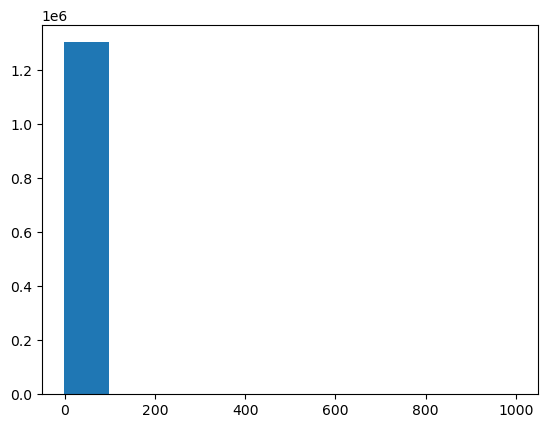

In [50]:
import matplotlib.pyplot as plt
plt.hist(data['dti'], bins = 10)

In [165]:
data.drop(['out_prncp', 'out_prncp_inv', 'total_rec_late_fee'], axis = 1, inplace = True)

C:\Users\chung\AppData\Local\Temp\ipykernel_6112\2059684825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['out_prncp', 'out_prncp_inv', 'total_rec_late_fee'], axis = 1, inplace = True)


In [166]:
data.to_csv('data.csv')

In [2]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
# show info
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

In [168]:
for i in data.columns:
    check = data[i].dtype
    if check == 'int64' or check == 'float64':
        print('%CONT2(' + 'TT.TRAIN, ' + i +  ',20);')

%CONT2(TT.TRAIN, loan_amnt,20);
%CONT2(TT.TRAIN, int_rate,20);
%CONT2(TT.TRAIN, installment,20);
%CONT2(TT.TRAIN, annual_inc,20);
%CONT2(TT.TRAIN, issue_d,20);
%CONT2(TT.TRAIN, dti,20);
%CONT2(TT.TRAIN, delinq_2yrs,20);
%CONT2(TT.TRAIN, earliest_cr_line,20);
%CONT2(TT.TRAIN, inq_last_6mths,20);
%CONT2(TT.TRAIN, open_acc,20);
%CONT2(TT.TRAIN, pub_rec,20);
%CONT2(TT.TRAIN, revol_bal,20);
%CONT2(TT.TRAIN, revol_util,20);
%CONT2(TT.TRAIN, total_acc,20);
%CONT2(TT.TRAIN, total_pymnt,20);
%CONT2(TT.TRAIN, total_pymnt_inv,20);
%CONT2(TT.TRAIN, total_rec_prncp,20);
%CONT2(TT.TRAIN, total_rec_int,20);
%CONT2(TT.TRAIN, last_pymnt_amnt,20);
%CONT2(TT.TRAIN, collections_12_mths_ex_med,20);
%CONT2(TT.TRAIN, acc_now_delinq,20);
%CONT2(TT.TRAIN, tot_coll_amt,20);
%CONT2(TT.TRAIN, tot_cur_bal,20);
%CONT2(TT.TRAIN, open_acc_6m,20);
%CONT2(TT.TRAIN, open_act_il,20);
%CONT2(TT.TRAIN, open_il_12m,20);
%CONT2(TT.TRAIN, open_il_24m,20);
%CONT2(TT.TRAIN, mths_since_rcnt_il,20);
%CONT2(TT.TRAIN, total_bal_il,

In [170]:
for i in data.columns:
    check = data[i].dtype
    if check == 'int64' or check == 'float64':
        print('%CHARACT(TT.TRAIN, ' + i+', '+i + 'f.);')
        
    elif check == 'object':
        print('%CHARACT(TT.TRAIN, ' + i+', $'+i + 'f.);')
    

%CHARACT(TT.TRAIN, loan_amnt, loan_amntf.);
%CHARACT(TT.TRAIN, term, $termf.);
%CHARACT(TT.TRAIN, int_rate, int_ratef.);
%CHARACT(TT.TRAIN, installment, installmentf.);
%CHARACT(TT.TRAIN, emp_length, $emp_lengthf.);
%CHARACT(TT.TRAIN, home_ownership, $home_ownershipf.);
%CHARACT(TT.TRAIN, annual_inc, annual_incf.);
%CHARACT(TT.TRAIN, verification_status, $verification_statusf.);
%CHARACT(TT.TRAIN, issue_d, issue_df.);
%CHARACT(TT.TRAIN, pymnt_plan, $pymnt_planf.);
%CHARACT(TT.TRAIN, purpose, $purposef.);
%CHARACT(TT.TRAIN, addr_state, $addr_statef.);
%CHARACT(TT.TRAIN, dti, dtif.);
%CHARACT(TT.TRAIN, delinq_2yrs, delinq_2yrsf.);
%CHARACT(TT.TRAIN, earliest_cr_line, earliest_cr_linef.);
%CHARACT(TT.TRAIN, inq_last_6mths, inq_last_6mthsf.);
%CHARACT(TT.TRAIN, open_acc, open_accf.);
%CHARACT(TT.TRAIN, pub_rec, pub_recf.);
%CHARACT(TT.TRAIN, revol_bal, revol_balf.);
%CHARACT(TT.TRAIN, revol_util, revol_utilf.);
%CHARACT(TT.TRAIN, total_acc, total_accf.);
%CHARACT(TT.TRAIN, initial_list_sta

In [9]:
import pandas as pd
data = pd.read_csv('from2016.csv')

C:\Users\chung\AppData\Local\Temp\ipykernel_18700\3945315693.py:2: DtypeWarning: Columns (19,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('from2016.csv')


In [5]:
model_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc', 'verification_status','dti', 'tot_cur_bal','acc_open_past_24mths','avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mort_acc', 'num_actv_rev_tl','num_rev_tl_bal_gt_0', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'open_rv_24m', 'all_util', 'inq_last_6mths', 'revol_util', 'total_rev_hi_lim', 'mo_sin_old_rev_tl_op', 'tot_hi_cred_lim', 'total_bc_limit']

In [6]:
len(model_columns)

26

In [7]:
def Training(namee):

    print('DATA TT2.'+namee+'_GROUP;')
    print('SET TT2.'+namee+';')

    for i in model_columns:
        check = data[i].dtype
        if check == 'int64' or check == 'float64':
            print('GRP_'+ i + '= PUT(' + i + ','+i+'f.);')
        else:
            print('GRP_' + i + '= ' + i+';')
    print('RUN;')
            
            
    print('\n')

    for i in model_columns:
        print('%WOECHARACT1(TT2.'+namee+'_GROUP, GRP_'+i+');')
        
    print('\n')

    print('DATA TT2.'+namee+'_WOE;')
    print('SET TT2.'+namee+'_GROUP;')
    for i in model_columns:
        print('WOE_'+i + '= INPUT(PUT(GRP_' + i+',$GRP_' + i +'W.),COMMA30.);')
        
        
    print('\n')

    print('PROC LOGISTIC DATA=TT2.'+namee+'_WOE DESCENDING NAMELEN=30 OUTEST=TT2.'+namee+'_PARAM;')
    print('MODEL GOOD = ')
    for i in model_columns:
        print('WOE_'+i)
    print('/SELECTION=STEPWISE SLENTRY=0.05 SLSTAY=0.05')
    print(';')
    print('OUTPUT OUT=TT2.'+namee+'_OUTPUT /*'+namee+'_OUTPUT*/ PREDICTED=SCORE;')
    print('RUN;')



In [10]:
Training('TRAIN')

DATA TT2.TRAIN_GROUP;
SET TT2.TRAIN;
GRP_loan_amnt= PUT(loan_amnt,loan_amntf.);
GRP_term= term;
GRP_int_rate= PUT(int_rate,int_ratef.);
GRP_installment= PUT(installment,installmentf.);
GRP_grade= grade;
GRP_annual_inc= PUT(annual_inc,annual_incf.);
GRP_verification_status= verification_status;
GRP_dti= PUT(dti,dtif.);
GRP_tot_cur_bal= PUT(tot_cur_bal,tot_cur_balf.);
GRP_acc_open_past_24mths= PUT(acc_open_past_24mths,acc_open_past_24mthsf.);
GRP_avg_cur_bal= PUT(avg_cur_bal,avg_cur_balf.);
GRP_bc_open_to_buy= PUT(bc_open_to_buy,bc_open_to_buyf.);
GRP_bc_util= PUT(bc_util,bc_utilf.);
GRP_mort_acc= PUT(mort_acc,mort_accf.);
GRP_num_actv_rev_tl= PUT(num_actv_rev_tl,num_actv_rev_tlf.);
GRP_num_rev_tl_bal_gt_0= PUT(num_rev_tl_bal_gt_0,num_rev_tl_bal_gt_0f.);
GRP_num_tl_op_past_12m= PUT(num_tl_op_past_12m,num_tl_op_past_12mf.);
GRP_percent_bc_gt_75= PUT(percent_bc_gt_75,percent_bc_gt_75f.);
GRP_open_rv_24m= PUT(open_rv_24m,open_rv_24mf.);
GRP_all_util= PUT(all_util,all_utilf.);
GRP_inq_last_6

In [11]:
for i in model_columns:
    print('%WOECHARACT1(TT.TRAIN_GROUP, GRP_'+i+');')

%WOECHARACT1(TT.TRAIN_GROUP, GRP_loan_amnt);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_term);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_int_rate);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_installment);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_grade);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_annual_inc);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_verification_status);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_acc_open_past_24mths);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_mort_acc);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_num_actv_rev_tl);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_num_rev_tl_bal_gt_0);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_num_tl_op_past_12m);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_percent_bc_gt_75);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_open_acc_6m);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_open_rv_12m);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_open_rv_24m);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_inq_last_12m);
%WOECHARACT1(TT.TRAIN_GROUP, GRP_inq_last_6mths);


In [12]:
print('DATA TT.TRAIN_WOE;')
print('SET TT.TRAIN_GROUP;')
for i in model_columns:
    print('WOE_'+i + '= INPUT(PUT(GRP_' + i+',$GRP_' + i +'W.),COMMA30.);')


DATA TT.TRAIN_WOE;
SET TT.TRAIN_GROUP;
WOE_loan_amnt= INPUT(PUT(GRP_loan_amnt,$GRP_loan_amntW.),COMMA30.);
WOE_term= INPUT(PUT(GRP_term,$GRP_termW.),COMMA30.);
WOE_int_rate= INPUT(PUT(GRP_int_rate,$GRP_int_rateW.),COMMA30.);
WOE_installment= INPUT(PUT(GRP_installment,$GRP_installmentW.),COMMA30.);
WOE_grade= INPUT(PUT(GRP_grade,$GRP_gradeW.),COMMA30.);
WOE_annual_inc= INPUT(PUT(GRP_annual_inc,$GRP_annual_incW.),COMMA30.);
WOE_verification_status= INPUT(PUT(GRP_verification_status,$GRP_verification_statusW.),COMMA30.);
WOE_acc_open_past_24mths= INPUT(PUT(GRP_acc_open_past_24mths,$GRP_acc_open_past_24mthsW.),COMMA30.);
WOE_mort_acc= INPUT(PUT(GRP_mort_acc,$GRP_mort_accW.),COMMA30.);
WOE_num_actv_rev_tl= INPUT(PUT(GRP_num_actv_rev_tl,$GRP_num_actv_rev_tlW.),COMMA30.);
WOE_num_rev_tl_bal_gt_0= INPUT(PUT(GRP_num_rev_tl_bal_gt_0,$GRP_num_rev_tl_bal_gt_0W.),COMMA30.);
WOE_num_tl_op_past_12m= INPUT(PUT(GRP_num_tl_op_past_12m,$GRP_num_tl_op_past_12mW.),COMMA30.);
WOE_percent_bc_gt_75= INPUT(PUT

In [20]:
print('PROC CORR DATA=TT.TRAIN_WOE NOPROB NOSIMPLE;')
print('VAR')
for i in model_columns:
    print('WOE_'+i)
print(";RUN;")

PROC CORR DATA=TT.TRAIN_WOE NOPROB NOSIMPLE;
VAR
WOE_loan_amnt
WOE_term
WOE_int_rate
WOE_installment
WOE_grade
WOE_annual_inc
WOE_verification_status
WOE_acc_open_past_24mths
WOE_mort_acc
WOE_num_actv_rev_tl
WOE_num_rev_tl_bal_gt_0
WOE_num_tl_op_past_12m
WOE_percent_bc_gt_75
WOE_open_acc_6m
WOE_open_rv_12m
WOE_open_rv_24m
WOE_inq_last_12m
WOE_inq_last_6mths
;RUN;


In [14]:
print('PROC LOGISTIC DATA=TT.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT.TRAIN_PARAM;')
print('MODEL GOOD = ')
for i in model_columns:
    print('WOE_'+i)
print('/SELECTION=STEPWISE SLENTRY=0.05 SLSTAY=0.05')
print(';')
print('OUTPUT OUT=TT.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;')
print('RUN;')

PROC LOGISTIC DATA=TT.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT.TRAIN_PARAM;
MODEL GOOD = 
WOE_loan_amnt
WOE_term
WOE_int_rate
WOE_installment
WOE_grade
WOE_annual_inc
WOE_verification_status
WOE_acc_open_past_24mths
WOE_mort_acc
WOE_num_actv_rev_tl
WOE_num_rev_tl_bal_gt_0
WOE_num_tl_op_past_12m
WOE_percent_bc_gt_75
WOE_open_acc_6m
WOE_open_rv_12m
WOE_open_rv_24m
WOE_inq_last_12m
WOE_inq_last_6mths
/SELECTION=STEPWISE SLENTRY=0.05 SLSTAY=0.05
;
OUTPUT OUT=TT.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;
RUN;


In [7]:
# Set option max columns display
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [16]:
df['total_rec_late_fee']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2260663    0.0
2260664    0.0
2260665    0.0
2260666    0.0
2260667    0.0
Name: total_rec_late_fee, Length: 2260668, dtype: float64

In [13]:
data['total_pymnt'].corr(data['last_pymnt_amnt'])

0.5937817780461313

In [14]:
test =  ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','last_pymnt_amnt', 'loan_status']
df[test][df['loan_status'] == 'Current'].head(100)


,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,loan_status
0,167.02,167.02,113.98,53.04,0.0,84.92,Current
1,1507.11,1507.11,612.25,894.86,0.0,777.23,Current
2,353.89,353.89,212.79,141.10,0.0,180.69,Current
3,286.71,286.71,168.07,118.64,0.0,146.51,Current
4,1423.21,1423.21,660.98,762.23,0.0,731.78,Current
5,377.95,377.95,247.50,130.45,0.0,192.45,Current
6,141.56,141.56,85.29,56.27,0.0,72.28,Current
7,201.53,201.53,135.99,65.54,0.0,208.31,Current
8,353.89,353.89,213.21,140.68,0.0,180.69,Current
9,405.64,405.64,269.80,135.84,0.0,206.44,Current


In [9]:
test =  ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','last_pymnt_amnt', 'loan_status']
df[test][df['loan_status'] == 'Fully Paid'].head(100)


,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,loan_status
100,30026.442500,30026.44,30000.0,26.44,0.0,30082.32,Fully Paid
152,40856.678960,40856.68,40000.0,856.68,0.0,40910.48,Fully Paid
170,20215.792430,20215.79,20000.0,215.79,0.0,20228.39,Fully Paid
186,4549.217149,4549.22,4500.0,49.22,0.0,4553.46,Fully Paid
215,8735.148975,8735.15,8425.0,310.15,0.0,8754.30,Fully Paid
269,20013.577333,20013.58,20000.0,13.58,0.0,20043.53,Fully Paid
271,6622.809000,6346.86,6600.0,22.81,0.0,6629.03,Fully Paid
296,2501.285667,2476.27,2500.0,1.29,0.0,2504.11,Fully Paid
369,4049.916667,4049.92,4000.0,49.92,0.0,55.91,Fully Paid
379,2700.838130,2675.83,2700.0,0.84,0.0,2702.68,Fully Paid


In [57]:
test =  ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','last_pymnt_amnt', 'GOOD']
data[test][data[test]['GOOD'] == 0].head(100)

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,GOOD
96,0.00,0.00,0.00,0.00,0.00,0
516,0.00,0.00,0.00,0.00,0.00,0
847,0.00,0.00,0.00,0.00,0.00,0
1167,284.25,284.25,79.72,204.53,306.97,0
1240,0.00,0.00,0.00,0.00,0.00,0
1311,161.90,161.90,103.28,58.62,170.92,0
1364,1147.96,1147.96,782.19,365.77,1204.23,0
1420,0.00,0.00,0.00,0.00,0.00,0
1528,481.63,480.88,356.19,125.44,490.59,0
1556,756.80,756.80,631.19,125.61,765.77,0


In [1]:
def proc_format(variable_name, cut, j = 0):
    print('PROC FORMAT;\n')
    print('''/* ''' + variable_name + ''' */\n''')
    print('VALUE ' + variable_name +'F')
    N = len(cut)
    for i in range(N + 1):
        if i == 0:
            print('LOW-' + str(cut[i]) + ' = ' + "'"+ '[' + str(i+j+1) + '] ' + 'LOW-' + str(cut[i]) + "'")
        elif 0 < i < N:
            print(str(cut[i-1]) + '<-' + str(cut[i])+ ' = ' + "'"+ '[' + str(i+1+j) + '] ' + str(cut[i-1]) + '<-' + str(cut[i]) + "'")
        else:
            print(str(cut[i-1])+'<-HIGH'  + ' = ' + "'"+ '[' + str(i+1+j) + '] ' + str(cut[i-1])+'<-HIGH' + "'" +';RUN;')
        


In [2]:
proc_format('num_bc_sats', [1, 2, 4, 6, 11])

PROC FORMAT;

/* num_bc_sats */

VALUE num_bc_satsF
LOW-1 = '[1] LOW-1'
1<-2 = '[2] 1<-2'
2<-4 = '[3] 2<-4'
4<-6 = '[4] 4<-6'
6<-11 = '[5] 6<-11'
11<-HIGH = '[6] 11<-HIGH';RUN;


In [5]:
proc_format('loan_amnt', [3200, 8000, 10000, 15000, 28000])


PROC FORMAT;

/* loan_amnt */

VALUE loan_amntF
LOW-3200 = '[1] LOW-3200'
3200<-8000 = '[2] 3200<-8000'
8000<-10000 = '[3] 8000<-10000'
10000<-15000 = '[4] 10000<-15000'
15000<-28000 = '[5] 15000<-28000'
28000<-HIGH = '[6] 28000<-HIGH';RUN;


In [3]:
proc_format('installment', [160, 218, 325])

PROC FORMAT;

/* installment */

VALUE installmentF
LOW-160 = '[1] LOW-160'
160<-218 = '[2] 160<-218'
218<-325 = '[3] 218<-325'
325<-HIGH = '[4] 325<-HIGH';RUN;


In [4]:
proc_format('annual_inc', [40000, 50000, 65000, 80000, 100000])

PROC FORMAT;

/* annual_inc */

VALUE annual_incF
LOW-40000 = '[1] LOW-40000'
40000<-50000 = '[2] 40000<-50000'
50000<-65000 = '[3] 50000<-65000'
65000<-80000 = '[4] 65000<-80000'
80000<-100000 = '[5] 80000<-100000'
100000<-HIGH = '[6] 100000<-HIGH';RUN;


In [27]:
proc_format('issue_d', [37, 49, 60])

PROC FORMAT;

/* issue_d */

VALUE issue_dF
LOW-37 = '[1] LOW-37'
37<-49 = '[2] 37<-49'
49<-60 = '[3] 49<-60'
60<-HIGH = '[4] 60<-HIGH';RUN;


In [28]:
proc_format('dti', [10.49, 15.33, 18.78, 24.04])

PROC FORMAT;

/* dti */

VALUE dtiF
LOW-10.49 = '[1] LOW-10.49'
10.49<-15.33 = '[2] 10.49<-15.33'
15.33<-18.78 = '[3] 15.33<-18.78'
18.78<-24.04 = '[4] 18.78<-24.04'
24.04<-HIGH = '[5] 24.04<-HIGH';RUN;


In [30]:
proc_format('inq_last_6mths', [0,1,2])

PROC FORMAT;

/* inq_last_6mths */

VALUE inq_last_6mthsF
LOW-0 = '[1] LOW-0'
0<-1 = '[2] 0<-1'
1<-2 = '[3] 1<-2'
2<-HIGH = '[4] 2<-HIGH';RUN;


In [32]:
proc_format('open_acc_6m', [0, 1])

PROC FORMAT;

/* open_acc_6m */

VALUE open_acc_6mF
LOW-0 = '[1] LOW-0'
0<-1 = '[2] 0<-1'
1<-HIGH = '[3] 1<-HIGH';RUN;


In [2]:
proc_format('inq_last_12m', [0, 2])

PROC FORMAT;

/* inq_last_12m */

VALUE inq_last_12mF
LOW-0 = '[1] LOW-0'
0<-2 = '[2] 0<-2'
2<-HIGH = '[3] 2<-HIGH';RUN;


In [9]:
proc_format('percent_bc_gt_75', [0, 25, 33.3,50, 66.7])

PROC FORMAT;

/* percent_bc_gt_75 */

VALUE percent_bc_gt_75F
LOW-0 = '[1] LOW-0'
0<-25 = '[2] 0<-25'
25<-33.3 = '[3] 25<-33.3'
33.3<-50 = '[4] 33.3<-50'
50<-66.7 = '[5] 50<-66.7'
66.7<-HIGH = '[6] 66.7<-HIGH';RUN;


In [13]:
proc_format('avg_cur_bal', [8000, 12000, 27000])

PROC FORMAT;

/* avg_cur_bal */

VALUE avg_cur_balF
LOW-8000 = '[1] LOW-8000'
8000<-12000 = '[2] 8000<-12000'
12000<-27000 = '[3] 12000<-27000'
27000<-HIGH = '[4] 27000<-HIGH';RUN;


In [54]:
columns = ['avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc']
data[columns][data[columns]['bc_util'].isnull()].head(1000)

,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc
35,13338.0,NaN,NaN,155.0,51.0,8.0,0.0,NaN
41,3854.0,NaN,NaN,134.0,49.0,6.0,2.0,NaN
51,1695.0,NaN,NaN,303.0,24.0,2.0,2.0,NaN
129,27188.0,NaN,NaN,136.0,10.0,2.0,4.0,NaN
157,19173.0,NaN,NaN,228.0,110.0,13.0,0.0,NaN
...,...,...,...,...,...,...,...,...
59701,26620.0,NaN,NaN,126.0,29.0,13.0,1.0,NaN
59843,21928.0,NaN,NaN,158.0,24.0,13.0,4.0,NaN
59876,2326.0,37.0,NaN,180.0,3.0,3.0,0.0,106.0
59921,58385.0,NaN,NaN,195.0,5.0,5.0,1.0,NaN


In [55]:
data[columns][data[columns]['mo_sin_old_rev_tl_op'].isnull()].head(1000)


,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc
957888,NaN,486.0,89.2,NaN,NaN,NaN,0.0,5.0
979425,NaN,4439.0,84.4,NaN,NaN,NaN,1.0,27.0
979845,NaN,9380.0,67.9,NaN,NaN,NaN,4.0,20.0
979919,NaN,5077.0,52.6,NaN,NaN,NaN,1.0,9.0
979955,NaN,10270.0,81.0,NaN,NaN,NaN,4.0,28.0
...,...,...,...,...,...,...,...,...
984314,NaN,2167.0,93.9,NaN,NaN,NaN,7.0,8.0
984315,NaN,31994.0,39.9,NaN,NaN,NaN,2.0,5.0
984316,NaN,52573.0,22.7,NaN,NaN,NaN,4.0,27.0
984317,NaN,4636.0,84.5,NaN,NaN,NaN,4.0,9.0


In [56]:
data[columns].to_csv('chung_test.csv')

In [3]:
df[['debt_settlement_flag', 'loan_status']]


,debt_settlement_flag,loan_status
0,N,Current
1,N,Current
2,N,Current
3,N,Current
4,N,Current
...,...,...
2260663,N,Current
2260664,N,Fully Paid
2260665,N,Current
2260666,N,Current


In [ ]:
df['loan_status']

In [22]:
test3 = ['issue_d','avg_cur_bal','mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m','pct_tl_nvr_dlq','tot_hi_cred_lim', 'total_il_high_credit_limit' ]
df[test3][df['loan_status'] == 'Fully Paid']
df_test = df[test3][df['pct_tl_nvr_dlq'].isnull()]
df_test['issue_d'].unique()
# df_test.head(200)

array(['Jul-2018', 'Jan-2018', 'Nov-2013', 'Oct-2013', 'Dec-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-2012',
       'Apr-2012', 'Mar-2012', 'Feb-2012', 'Jan-2012', 'Dec-2011',
       'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011',
       'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011',
       'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010',
       'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010',
       'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009',
       'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009', 'Jun-2009',
       'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009', 'Jan-2009',
       'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008', 'Aug-2008',
       'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008', 'Mar-2008',
       'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007', 'Oct-2007',
       'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007'], dtype=object)

In [23]:
df['issue_d'].unique()

array(['Dec-2018', 'Nov-2018', 'Oct-2018', 'Sep-2018', 'Aug-2018',
       'Jul-2018', 'Jun-2018', 'May-2018', 'Apr-2018', 'Mar-2018',
       'Feb-2018', 'Jan-2018', 'Sep-2016', 'Aug-2016', 'Jul-2016',
       'Jun-2016', 'May-2016', 'Apr-2016', 'Mar-2016', 'Feb-2016',
       'Jan-2016', 'Dec-2016', 'Nov-2016', 'Oct-2016', 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Mar-2017', 'Feb-2017', 'Jan-2017', 'Sep-2017',
       'Aug-2017', 'Jul-2017', 'Jun-2017', 'May-2017', 'Apr-2017',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-2012',
       'Apr-2012', 'Mar-2012', 'Feb-2012', 'Jan-2012', 'Dec-2014',
       'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014', 'Jul-20

In [14]:
# Lọc dữ liệu. Chỉ giữ lại các cột có loan_status bằng Fully Paid hoặc Charged Off và gán vào 1 dataframe mới tên data
data2 = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [15]:
thieu_5_180012 = ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','mo_sin_rcnt_tl','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',	'num_bc_tl','num_il_tl'	,'num_op_rev_tl','num_rev_tl_bal_gt_0',	'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','tot_hi_cred_lim',	'total_il_high_credit_limit']
thieu_61_679862 = ['open_acc_6m', 'total_cu_tl', 'inq_last_12m']
thieu_61_679785 = ['open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'inq_fi']
thieu_0_004296 = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths']
thieu_4_283576 = ['num_bc_sats', 'num_sats']
thieu_revol_util = ['revol_util']
thieu_3_626937 = ['total_bal_ex_mort', 'total_bc_limit']
thieu_percent_bc_gt_75 = ['percent_bc_gt_75']
thieu_pct_tl_nvr_dlq = ['pct_tl_nvr_dlq']
thieu_mths_since_rcnt_il = ['mths_since_rcnt_il']
thieu_all_util_61_683698 = ['all_util']
thieu_avg_cur_bal = ['avg_cur_bal']
thieu_bc_open_to_buy = ['bc_open_to_buy']
thieu_bc_util = ['bc_util']
thieu_mo_sin_old_il_acct = ['mo_sin_old_il_acct']
thieu_mths_since_recent_bc = ['mths_since_recent_bc']
thieu_mths_since_recent_bc_dlq = ['mths_since_recent_bc_dlq']
thieu_mths_since_recent_inq = ['mths_since_recent_inq']
thieu_mths_since_recent_revol_delinq = ['mths_since_recent_revol_delinq']
thieu_num_tl_120dpd_2m = ['num_tl_120dpd_2m']


In [16]:
thieu_bc_open_to_buy = ['bc_open_to_buy']
thieu_columns = [thieu_5_180012, thieu_61_679862, thieu_61_679785, thieu_0_004296, thieu_4_283576, thieu_revol_util, thieu_3_626937, thieu_percent_bc_gt_75, thieu_pct_tl_nvr_dlq, thieu_mths_since_rcnt_il, thieu_all_util_61_683698, thieu_avg_cur_bal, thieu_bc_open_to_buy, thieu_bc_util, thieu_mo_sin_old_il_acct, thieu_mths_since_recent_bc, thieu_mths_since_recent_bc_dlq, thieu_mths_since_recent_inq, thieu_mths_since_recent_revol_delinq, thieu_num_tl_120dpd_2m]
thieu_columns_str = ['thieu_5_180012', 'thieu_61_679862', 'thieu_61_679785', 'thieu_0_004296', 'thieu_4_283576', 'thieu_revol_util', 'thieu_3_626937', 'thieu_percent_bc_gt_75', 'thieu_pct_tl_nvr_dlq', 'thieu_mths_since_rcnt_il', 'thieu_all_util_61_683698', 'thieu_avg_cur_bal', 'thieu_bc_open_to_buy', 'thieu_bc_util', 'thieu_mo_sin_old_il_acct', 'thieu_mths_since_recent_bc', 'thieu_mths_since_recent_bc_dlq', 'thieu_mths_since_recent_inq', 'thieu_mths_since_recent_revol_delinq', 'thieu_num_tl_120dpd_2m']


In [17]:
N = len(thieu_columns)
for i in range(N):
    print(thieu_columns_str[i])
    print(data2[thieu_columns[i]+['issue_d']][data2[thieu_columns[i]].isna().all(axis = 1)].issue_d.unique())
    print('\n')
    
    

thieu_5_180012
<DatetimeArray>
['2012-12-01 00:00:00', '2012-09-01 00:00:00', '2012-08-01 00:00:00',
 '2012-07-01 00:00:00', '2012-06-01 00:00:00', '2012-05-01 00:00:00',
 '2012-04-01 00:00:00', '2012-03-01 00:00:00', '2012-02-01 00:00:00',
 '2012-01-01 00:00:00', '2011-12-01 00:00:00', '2011-11-01 00:00:00',
 '2011-10-01 00:00:00', '2011-09-01 00:00:00', '2011-08-01 00:00:00',
 '2011-07-01 00:00:00', '2011-06-01 00:00:00', '2011-05-01 00:00:00',
 '2011-04-01 00:00:00', '2011-03-01 00:00:00', '2011-02-01 00:00:00',
 '2011-01-01 00:00:00', '2010-12-01 00:00:00', '2010-11-01 00:00:00',
 '2010-10-01 00:00:00', '2010-09-01 00:00:00', '2010-08-01 00:00:00',
 '2010-07-01 00:00:00', '2010-06-01 00:00:00', '2010-05-01 00:00:00',
 '2010-04-01 00:00:00', '2010-03-01 00:00:00', '2010-02-01 00:00:00',
 '2010-01-01 00:00:00', '2009-12-01 00:00:00', '2009-11-01 00:00:00',
 '2009-10-01 00:00:00', '2009-09-01 00:00:00', '2009-08-01 00:00:00',
 '2009-07-01 00:00:00', '2009-06-01 00:00:00', '2009-05-01 

In [23]:
data = df.dropna(subset=['open_acc_6m'])

In [24]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Set option max columns display
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [ ]:
# show info
list_item = []
for col in df.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())


In [27]:
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,float64,1394538,100.000000,0,[nan]
1,member_id,float64,1394538,100.000000,0,[nan]
2,loan_amnt,int64,0,0.000000,1561,"[2500, 30000, 5000, 4000]"
3,funded_amnt,int64,0,0.000000,1561,"[2500, 30000, 5000, 4000]"
4,funded_amnt_inv,float64,0,0.000000,1580,"[2500.0, 30000.0, 5000.0, 4000.0]"
5,term,object,0,0.000000,2,"[ 36 months, 60 months]"
6,int_rate,float64,0,0.000000,242,"[13.56, 18.94, 17.97, 16.14]"
7,installment,float64,0,0.000000,74675,"[84.92, 777.23, 180.69, 146.51]"
8,grade,object,0,0.000000,7,"[C, D, B, A]"
9,sub_grade,object,0,0.000000,35,"[C1, D2, D1, C4]"


In [28]:
# Lọc dữ liệu. Chỉ giữ lại các cột có loan_status bằng Fully Paid hoặc Charged Off và gán vào 1 dataframe mới tên data
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [ ]:
# Thêm 1 cột Good, trong đó Fully Paid là 1 và Charged Off là 0.
# make a good_loan list
good_loan = ['Fully Paid']

# categorizing whether its a good loan or bad loan
data['loan_status'] = np.where(data['loan_status'].isin(good_loan), 1, 0)
data['loan_status'].value_counts()/len(data)*100



In [32]:
data['issue_d'].unique()

<DatetimeArray>
['2018-12-01 00:00:00', '2018-11-01 00:00:00', '2018-10-01 00:00:00',
 '2018-09-01 00:00:00', '2018-08-01 00:00:00', '2018-07-01 00:00:00',
 '2018-06-01 00:00:00', '2018-05-01 00:00:00', '2018-04-01 00:00:00',
 '2018-03-01 00:00:00', '2018-02-01 00:00:00', '2018-01-01 00:00:00',
 '2016-09-01 00:00:00', '2016-08-01 00:00:00', '2016-07-01 00:00:00',
 '2016-06-01 00:00:00', '2016-05-01 00:00:00', '2016-04-01 00:00:00',
 '2016-03-01 00:00:00', '2016-02-01 00:00:00', '2016-01-01 00:00:00',
 '2016-12-01 00:00:00', '2016-11-01 00:00:00', '2016-10-01 00:00:00',
 '2015-12-01 00:00:00', '2017-03-01 00:00:00', '2017-02-01 00:00:00',
 '2017-01-01 00:00:00', '2017-09-01 00:00:00', '2017-08-01 00:00:00',
 '2017-07-01 00:00:00', '2017-06-01 00:00:00', '2017-05-01 00:00:00',
 '2017-04-01 00:00:00', '2017-12-01 00:00:00', '2017-11-01 00:00:00',
 '2017-10-01 00:00:00']
Length: 37, dtype: datetime64[ns]

In [33]:
# show info
list_item = []
for col in df.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())


In [34]:
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,float64,499544,100.000000,0,[nan]
1,member_id,float64,499544,100.000000,0,[nan]
2,loan_amnt,int64,0,0.000000,1546,"[30000, 40000, 20000, 4500]"
3,funded_amnt,int64,0,0.000000,1546,"[30000, 40000, 20000, 4500]"
4,funded_amnt_inv,float64,0,0.000000,1559,"[30000.0, 40000.0, 20000.0, 4500.0]"
5,term,object,0,0.000000,2,"[ 36 months, 60 months]"
6,int_rate,float64,0,0.000000,242,"[22.35, 16.14, 7.56, 11.31]"
7,installment,float64,0,0.000000,52866,"[1151.16, 975.71, 622.68, 147.99]"
8,grade,object,0,0.000000,7,"[D, C, A, B]"
9,sub_grade,object,0,0.000000,35,"[D5, C4, A3, B3]"


In [21]:
data.shape


(1303607, 146)

In [22]:
data.set_index('issue_d', inplace=True)

In [23]:
data.sort_index(inplace = True)

C:\Users\chung\AppData\Local\Temp\ipykernel_18680\3116350130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace = True)


In [24]:
data.index

DatetimeIndex(['2007-06-01', '2007-07-01', '2007-07-01', '2007-07-01',
               '2007-07-01', '2007-07-01', '2007-07-01', '2007-07-01',
               '2007-07-01', '2007-07-01',
               ...
               '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
               '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
               '2018-12-01', '2018-12-01'],
              dtype='datetime64[ns]', name='issue_d', length=1303607, freq=None)

In [25]:
# Tính bad rate theo năm
bad_rate_by_year = data.groupby(data.index.year)['BAD'].mean()

In [26]:
bad_rate_by_year.to_csv('bad_rate_by_year.csv')

In [27]:
bad_rate_by_year

issue_d
2007    0.179283
2008    0.158131
2009    0.125954
2010    0.128901
2011    0.151789
2012    0.161973
2013    0.155958
2014    0.185381
2015    0.201587
2016    0.242691
2017    0.228943
2018    0.147132
Name: BAD, dtype: float64

In [12]:
missing_by_year = data.resample('Y').apply(lambda x: x.isnull().sum())


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [13]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term', 'GOOD',
       'BAD'],
      dtype='object', length=145)

In [42]:
missing_by_month = df.resample('M').apply(lambda x: x.isnull().sum())

In [40]:
missing_by_year.to_csv('missing_by_year.csv')

In [43]:
missing_by_month.to_csv('missing_by_month.csv')

In [44]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-06-01,NaN,NaN,1400,1400,475.0,36 months,10.91,45.78,C,C3,"Stanford University Libraries, LOCKSS Project",< 1 year,RENT,40000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,NaN,I'm starting full-time work as a programmer wi...,other,Starting a new job in a new city,652xx,MO,8.61,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,f,0.00,0.00,1663.240931,564.31,1400.00,248.24,15.0,0.00,0.00,2010-07-01,1.78,2010-08-01,2014-09-01,NaN,NaN,1,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-01,NaN,NaN,2525,2525,225.0,36 months,9.33,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,NaN,"I need to pay $2,100 for fixing my Volvo :) A...",other,Car repair bill,100xx,NY,10.00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,f,0.00,0.00,2904.498829,258.82,2525.00,379.50,0.0,0.00,0.00,2010-06-01,82.03,2010-07-01,2007-05-01,NaN,NaN,1,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Dữ liệu từ sau tháng 3 năm 2016.


In [48]:
data = df['2016-03':]

In [ ]:
# show info
list_item = []
for col in df.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df


In [50]:
# Lọc dữ liệu. Chỉ giữ lại các cột có loan_status bằng Fully Paid hoặc Charged Off và gán vào 1 dataframe mới tên data
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [51]:
# Thêm 1 cột Good, trong đó Fully Paid là 1 và Charged Off là 0.
# make a good_loan list
good_loan = ['Fully Paid']

# categorizing whether its a good loan or bad loan
data['loan_status'] = np.where(data['loan_status'].isin(good_loan), 1, 0)
data['loan_status'].value_counts()/len(data)*100



loan_status
1    76.713657
0    23.286343
Name: count, dtype: float64

In [52]:
data.shape

(420723, 144)

In [3]:
# show info
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df


,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,issue_d,object,0,0.000000,34,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-01]"
1,id,float64,420723,100.000000,0,[nan]
2,member_id,float64,420723,100.000000,0,[nan]
3,loan_amnt,int64,0,0.000000,1545,"[20000, 5600, 7200, 25000]"
4,funded_amnt,int64,0,0.000000,1545,"[20000, 5600, 7200, 25000]"
...,...,...,...,...,...,...
142,settlement_amount,float64,408305,97.048414,9839,"[nan, 4263.33, 1422.02, 11391.0]"
143,settlement_percentage,float64,408305,97.048414,651,"[nan, 54.03, 45.0, 45.02]"
144,settlement_term,float64,408305,97.048414,36,"[nan, 1.0, 18.0, 4.0]"
145,GOOD,int64,0,0.000000,2,"[1, 0]"


In [4]:
desc_df.to_csv('desc_df.csv')

In [58]:
data['GOOD'] = data['loan_status']
data['BAD'] = 1 - data['GOOD']

In [67]:
data['last_pymnt_d'].isnull().sum()

1524

In [68]:
data.to_csv('from2016.csv')

In [69]:
data.shape

(420723, 146)

In [70]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,GOOD,BAD
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-01,NaN,NaN,20000,20000,20000.0,36 months,11.99,664.20,C,C1,rn case manager,10+ years,MORTGAGE,49000.0,Source Verified,1,n,NaN,NaN,debt_consolidation,Debt consolidation,321xx,FL,15.58,1.0,2001-06-01,0.0,15.0,NaN,8.0,0.0,19014,89.7,28.0,w,0.0,0.0,23693.642605,23693.64,20000.00,3693.64,0.00,0.00,0.0000,2018-08-01,5786.88,NaT,2018-08-01,0.0,35.0,1,Individual,NaN,NaN,NaN,0.0,0.0,125922.0,0.0,1.0,0.0,0.0,34.0,10623.0,87.0,0.0,0.0,7414.0,89.0,21200.0,0.0,5.0,0.0,0.0,15740.0,481.0,96.3,0.0,0.0,122.0,112.0,55.0,34.0,5.0,111.0,NaN,NaN,NaN,4.0,2.0,6.0,2.0,4.0,11.0,6.0,12.0,6.0,8.0,0.0,0.0,0.0,0.0,82.1,100.0,0.0,0.0,140308.0,29637.0,13100.0,12193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2016-03-01,NaN,NaN,5600,5600,5600.0,36 months,12.99,188.66,C,C2,Payroll Clerk,10+ years,RENT,40000.0,Source Verified,1,n,NaN,NaN,debt_consolidation,Debt consolidation,954xx,CA,36.57,0.0,2005-11-01,0.0,26.0,NaN,14.0,0.0,3720,33.8,22.0,f,0.0,0.0,6723.466967,6723.47,5600.00,1123.47,0.00,0.00,0.0000,2018-08-01,1637.73,NaT,2018-10-01,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,59494.0,3.0,2.0,1.0,3.0,4.0,55774.0,92.0,5.0,6.0,1419.0,83.0,11000.0,3.0,0.0,3.0,9.0,4958.0,3246.0,47.6,0.0,0.0,124.0,95.0,5.0,4.0,0.0,6.0,26.0,4.0,26.0,0.0,4.0,7.0,4.0,4.0,8.0,12.0,14.0,7.0,14.0,0.0,0.0,0.0,6.0,77.3,0.0,0.0,0.0,71559.0,59494.0,6200.0,60559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,Na

In [14]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,GOOD,BAD
100,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
152,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
170,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
186,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
215,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260654,NaN,NaN,30000,30000,30000.0,60 months,17.09,747.03,D,D1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2260655,NaN,NaN,18000,18000,18000.0,60 months,30.65,589.57,F,F4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2260656,NaN,NaN,17950,17950,17950.0,60 months,30.17,582.62,F,F3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2260658,NaN,NaN,15000,15000,15000.0,60 months,16.02,364.94,C,C5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('final_lendingClub_data.csv')

C:\Users\chung\AppData\Local\Temp\ipykernel_15052\3801917206.py:1: DtypeWarning: Columns (19,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('final_lendingClub_data.csv')


In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term', 'GOOD',
       'BAD'],
      dtype='object', length=147)

In [5]:
model_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc', 'verification_status','acc_open_past_24mths', 'mort_acc', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'open_acc_6m', 'open_rv_12m', 'open_rv_24m', 'inq_last_12m', 'inq_last_6mths', 'GOOD']

In [6]:
data_for_compare= data[model_columns]

In [7]:
data_for_compare.dtypes


loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
annual_inc              float64
verification_status      object
acc_open_past_24mths    float64
mort_acc                float64
num_actv_rev_tl         float64
num_rev_tl_bal_gt_0     float64
num_tl_op_past_12m      float64
percent_bc_gt_75        float64
open_acc_6m             float64
open_rv_12m             float64
open_rv_24m             float64
inq_last_12m            float64
inq_last_6mths          float64
GOOD                      int64
dtype: object

In [16]:
for i in data_for_compare.columns:
    check1 = i!= 'GOOD'
    check2 = data_for_compare[i].dtype
    if check1 and (check2 == 'int64' or check2 == 'float64'):
        mean_value = data_for_compare[i].mean()
        data_for_compare[i].fillna(mean_value, inplace = True)
        

C:\Users\chung\AppData\Local\Temp\ipykernel_15052\753017459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_compare[i].fillna(mean_value, inplace = True)


In [17]:
data_for_compare.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
annual_inc              float64
verification_status      object
acc_open_past_24mths    float64
mort_acc                float64
num_actv_rev_tl         float64
num_rev_tl_bal_gt_0     float64
num_tl_op_past_12m      float64
percent_bc_gt_75        float64
open_acc_6m             float64
open_rv_12m             float64
open_rv_24m             float64
inq_last_12m            float64
inq_last_6mths          float64
GOOD                      int64
dtype: object

In [18]:
category_columns = ['term', 'grade', 'verification_status']

In [19]:
data_for_compare = pd.get_dummies(data_for_compare, columns=category_columns,dtype='int64')

,loan_amnt,int_rate,installment,annual_inc,acc_open_past_24mths,mort_acc,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_op_past_12m,percent_bc_gt_75,...,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,30000,22.35,1151.16,100000.0,4.0,1.0,4.0,4.0,2.0,33.3,...,0,0,0,1,0,0,0,0,1,0
1,40000,16.14,975.71,45000.0,5.0,1.0,9.0,9.0,4.0,42.9,...,0,0,1,0,0,0,0,0,0,1
2,20000,7.56,622.68,100000.0,5.0,5.0,5.0,5.0,1.0,20.0,...,1,0,0,0,0,0,0,1,0,0
3,4500,11.31,147.99,38500.0,8.0,0.0,5.0,5.0,4.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,8425,27.27,345.18,450000.0,10.0,4.0,8.0,8.0,2.0,50.0,...,0,0,0,0,1,0,0,0,0,1


In [20]:
data_for_compare =  pd.read_csv('')

,loan_amnt,int_rate,installment,annual_inc,acc_open_past_24mths,mort_acc,num_actv_rev_tl,num_rev_tl_bal_gt_0,num_tl_op_past_12m,percent_bc_gt_75,...,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,30000,22.35,1151.16,100000.0,4.0,1.0,4.0,4.0,2.0,33.3,...,0,0,0,1,0,0,0,0,1,0
1,40000,16.14,975.71,45000.0,5.0,1.0,9.0,9.0,4.0,42.9,...,0,0,1,0,0,0,0,0,0,1
2,20000,7.56,622.68,100000.0,5.0,5.0,5.0,5.0,1.0,20.0,...,1,0,0,0,0,0,0,1,0,0
3,4500,11.31,147.99,38500.0,8.0,0.0,5.0,5.0,4.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,8425,27.27,345.18,450000.0,10.0,4.0,8.0,8.0,2.0,50.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303602,30000,17.09,747.03,80000.0,4.0,0.0,6.0,6.0,3.0,33.3,...,0,0,0,1,0,0,0,1,0,0
1303603,18000,30.65,589.57,77000.0,6.0,1.0,5.0,5.0,5.0,50.0,...,0,0,0,0,0,1,0,0,0,1
1303604,17950,30.17,582.62,53758.0,5.0,3.0,5.0,5.0,2.0,0.0,...,0,0,0,0,0,1,0,0,1,0
1303605,15000,16.02,364.94,85000.0,17.0,1.0,6.0,6.0,7.0,0.0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data_for_compare.drop('GOOD', axis=1)  # features
y = data_for_compare['GOOD']  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42, verbose=20)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],eval_metric='logloss')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 729366, number of negative: 183158
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.759820
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.175496
[LightGBM] [Debug] init for col-wise cost 0.018968 seconds, init for row-wise cost 0.061410 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 912524, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799284 -> initscore=1.381826
[LightGBM] [Info] Start training

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42, verbose=20)

In [23]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8033
Testing accuracy 0.8024


In [26]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
model.predict_proba(X_test)[:,1]

array([0.81799605, 0.88350129, 0.7429711 , ..., 0.90846119, 0.96086589,
       0.61211723])

In [36]:
import sklearn
2*sklearn.metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])-1

0.4361501796466698

In [38]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

Here we normalize the data, which means putting it on some common scale (value – mean / standard deviation), a machine learning data convention.


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(27,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=13, batch_size=128, verbose=1)

c:\Users\chung\miniconda3\envs\spyder-env\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7843 - loss: 0.5164
Epoch 2/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.7998 - loss: 0.4618
Epoch 3/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7997 - loss: 0.4597
Epoch 4/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8005 - loss: 0.4571
Epoch 5/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8010 - loss: 0.4565
Epoch 6/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8004 - loss: 0.4566
Epoch 7/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8002 - loss: 0.4572
Epoch 8/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8010 - loss: 0.4560
Epoch 9/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8012 - loss: 0.4552
Epoch 10/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8005 - loss: 0.4567
Epoch 11/13
7130/7130 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8008 - loss: 0.4564
Epoch 12/13
7130/71

In [47]:

import sklearn
2*sklearn.metrics.roc_auc_score(y_test, model.predict(X_test))-1

12222/12222 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


0.4186675147584886

In [1]:
import pandas as pd
data = pd.read_csv('from2016.csv')

C:\Users\chung\AppData\Local\Temp\ipykernel_18504\3945315693.py:2: DtypeWarning: Columns (19,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('from2016.csv')


In [5]:
(data['acc_now_delinq'] == 0).any()

True

In [8]:
data['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4.])

In [5]:
columns = ['WOE_loan_amnt','WOE_term','WOE_int_rate','WOE_installment','WOE_grade','WOE_annual_inc','WOE_verification_status','WOE_dti', 'WOE_bc_open_to_buy', 'WOE_mort_acc', 'WOE_num_actv_rev_tl', 'WOE_percent_bc_gt_75', 'WOE_open_rv_24m', 'WOE_all_util', 'WOE_inq_last_6mths', 'WOE_revol_util', 'WOE_total_rev_hi_lim', 'WOE_mo_sin_old_rev_tl_op', 'WOE_tot_hi_cred_lim','WOE_total_bc_limit']

a1 = ['WOE_loan_amnt', 'WOE_installment']
a2 = ['WOE_int_rate', 'WOE_grade']
a3 = ['WOE_bc_open_to_buy','WOE_total_bc_limit', 'WOE_total_rev_hi_lim']

excluded_set = set(a1+a2+a3)

a4 = [x for x in columns if x not in excluded_set]


In [6]:
len(columns)

20

In [7]:
for i1 in a1:
    for i2 in a2:
        for i3 in a3:
                        print('PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;')
                        print('MODEL GOOD = ')
                        print(i1)
                        print(i2)
                        print(i3)
                        for i4 in a4:
                           print(i4)   
                        print('/SELECTION=STEPWISE SLENTRY=0.05 SLSTAY=0.05')
                        print(';')
                        print('OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;')
                        print('RUN;')
                        print('\n')
                        

PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;
MODEL GOOD = 
WOE_loan_amnt
WOE_int_rate
WOE_bc_open_to_buy
WOE_term
WOE_annual_inc
WOE_verification_status
WOE_dti
WOE_mort_acc
WOE_num_actv_rev_tl
WOE_percent_bc_gt_75
WOE_open_rv_24m
WOE_all_util
WOE_inq_last_6mths
WOE_revol_util
WOE_mo_sin_old_rev_tl_op
WOE_tot_hi_cred_lim
/SELECTION=STEPWISE SLENTRY=0.05 SLSTAY=0.05
;
OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;
RUN;


PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;
MODEL GOOD = 
WOE_loan_amnt
WOE_int_rate
WOE_total_bc_limit
WOE_term
WOE_annual_inc
WOE_verification_status
WOE_dti
WOE_mort_acc
WOE_num_actv_rev_tl
WOE_percent_bc_gt_75
WOE_open_rv_24m
WOE_all_util
WOE_inq_last_6mths
WOE_revol_util
WOE_mo_sin_old_rev_tl_op
WOE_tot_hi_cred_lim
/SELECTION=STEPWISE SLENTRY=0.05 SLSTAY=0.05
;
OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;
RUN;


PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30

In [8]:
woe_variables = ['WOE_grade', 'WOE_tot_hi_cred_lim', 'WOE_num_actv_rev_tl', 'WOE_loan_amnt', 'WOE_dti', 'WOE_total_bc_limit', 'WOE_verification_status', 'WOE_mort_acc', 'WOE_term', 'WOE_inq_last_6mths', 'WOE_percent_bc_gt_75', 'WOE_annual_inc', 'WOE_mo_sin_old_rev_tl_op', 'WOE_open_rv_24m', 'WOE_revol_util', 'WOE_all_util']


In [ ]:
for i in range(len(woe_variables)):
    print('PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;')
    print('MODEL GOOD = ')
    for j in range(i+1):
        print(woe_variables[j])
    print('/SELECTION=Forward  SLENTRY=0.05 /*SLSTAY=0.05 */;')
    print(';')
    print('OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;')
    print('RUN;')
    print('\n')

In [13]:
woe_variables2 = ['WOE_grade', 'WOE_tot_hi_cred_lim', 'WOE_num_actv_rev_tl', 'WOE_loan_amnt', 'WOE_dti', 'WOE_verification_status', 'WOE_total_rev_hi_lim', 'WOE_mort_acc', 'WOE_term', 'WOE_inq_last_6mths', 'WOE_percent_bc_gt_75', 'WOE_annual_inc', 'WOE_mo_sin_old_rev_tl_op', 'WOE_open_rv_24m', 'WOE_revol_util', 'WOE_all_util']
for i in range(len(woe_variables2)):
    print('PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;')
    print('MODEL GOOD = ')
    for j in range(i+1):
        print(woe_variables2[j])
    print('/SELECTION=Forward  SLENTRY=0.05 /*SLSTAY=0.05 */;')
    print(';')
    print('OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;')
    print('RUN;')
    print('\n')


PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;
MODEL GOOD = 
WOE_grade
/SELECTION=Forward  SLENTRY=0.05 /*SLSTAY=0.05 */;
;
OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;
RUN;


PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;
MODEL GOOD = 
WOE_grade
WOE_tot_hi_cred_lim
/SELECTION=Forward  SLENTRY=0.05 /*SLSTAY=0.05 */;
;
OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;
RUN;


PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;
MODEL GOOD = 
WOE_grade
WOE_tot_hi_cred_lim
WOE_num_actv_rev_tl
/SELECTION=Forward  SLENTRY=0.05 /*SLSTAY=0.05 */;
;
OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=SCORE;
RUN;


PROC LOGISTIC DATA=TT2.TRAIN_WOE DESCENDING NAMELEN=30 OUTEST=TT2.TRAIN_PARAM;
MODEL GOOD = 
WOE_grade
WOE_tot_hi_cred_lim
WOE_num_actv_rev_tl
WOE_loan_amnt
/SELECTION=Forward  SLENTRY=0.05 /*SLSTAY=0.05 */;
;
OUTPUT OUT=TT2.TRAIN_OUTPUT /*TRAIN_OUTPUT*/ PREDICTED=

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('E:/TT/TRAIN (1).csv')

C:\Users\chung\AppData\Local\Temp\ipykernel_13200\1261263400.py:4: DtypeWarning: Columns (20,56,113,124,125,126,129,130,131,134,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('E:/TT/TRAIN (1).csv')


In [121]:
data_test = data[['loan_amnt','dti','revol_util', 'term','percent_bc_gt_75', 'int_rate', 'GOOD']]

In [109]:
from itertools import combinations


def get_index(format_lists, name):
    N = len(format_lists)
    for i in range(N):
        if format_lists[i]['name'] == name:
            return i
    return -1

def create_groupData(data, target, num_bins = 20, format_lists = None):
    GRP_data = pd.DataFrame()
    col_names = data.columns
    for var_name in col_names[~col_names.isin([target])]:
        if data[var_name].dtype.kind in 'bifc': 
            check = get_index(format_lists, var_name)
            temp = data[var_name]
            if check != -1:
                format_temp = format_lists[check]
                if 'missing' in format_temp:
                    filtered_data = temp[(temp > format_temp['missing'][0]) & (temp <= format_temp['missing'][1])]
                    mean_in_range = filtered_data.mean()
                    temp = temp.fillna(mean_in_range)
                GRP_data[var_name] = pd.cut(temp, bins = format_temp['bins'])
            else:
                 GRP_data[var_name] = pd.qcut(temp, q = num_bins, duplicates = 'drop')
        else:
            check = get_index(format_lists, var_name)
            temp = data[var_name]
            if check != -1:
                format_temp = format_lists[check]
                if 'missing' in format_temp:
                    GRP_data[var_name] = temp.map(format_temp['bins']).fillna(format_temp['missing'])
                else:
                    GRP_data[var_name] = temp.map(format_temp['bins'])
            else:
                GRP_data[var_name] = temp
        # GRP_data = GRP_data.astype(str)            
        GRP_data[target] = data[target]
        
    return GRP_data
    
def iv_woe(data, target):
    cols = data.columns
    iv = pd.DataFrame()
    woe = []
    NN = len(data)
    for ivars in cols[~cols.isin([target])]:
        d0 = data[[ivars, target]]
        d = d0.groupby(ivars, as_index=True, dropna = False).agg(["count", "sum"])
        d.columns = ['N', 'Events']
        d['Percent'] = (d['N']/NN)*100
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        iv=pd.concat([iv,temp], axis=0)
        woe.append(d)
    return iv, woe

def iv_woe_cross(data, target):
    cols = data.columns
    cols = [x for x in cols if x != target]
    iv = pd.DataFrame()
    woe = []
    NN = len(data)
    for combination in combinations(cols,2):
        jvars, ivars = combination[0], combination[1]
        d0 = data[[jvars,ivars, target]]
        d = d0.groupby([jvars, ivars], as_index=False, dropna = False).agg(["count", "sum"])
        d.columns = ['N', 'Events']
        d['Percent'] = (d['N']/NN)*100
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        temp =pd.DataFrame({"Variable 1" : [jvars], 'Variable 2' : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable 1",'Variable 2', "IV"])
        iv=pd.concat([iv,temp])
        woe.append(d)
    return iv, woe

def create_woe_data(data, target):
    data = data.astype(str)
    data[target] = data[target].astype(int)
    NN = len(data)
    woe_data = pd.DataFrame()
    col_names = data.columns
    for ivars in col_names[~col_names.isin([target])]:
        d0 = data[[ivars, target]]
        d = d0.groupby(ivars, as_index=True, dropna = False).agg(["count", "sum"])
        d.columns = ['N', 'Events']
        d['Percent'] = (d['N']/NN)*100
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        woe_mapping = d['WoE'].to_dict()
        woe_data[ivars] = data[ivars].map(woe_mapping)
    woe_data[target] = data[target]
    return woe_data


        
       
       
 



In [82]:
data_test = data[['dti','term','revol_util', 'loan_amnt', 'int_rate', 'GOOD']]

#format_list
loan_amnt= {'name': 'loan_amnt','bins': [-np.inf, 3000,10000, 15000, np.inf]}
dti = {'name': 'dti','bins': [-np.inf, 14, 17, 22, 26, 30, np.inf], 'missing': [17, 22]}
revol_util = {'name': 'revol_util','bins': [-np.inf, 18, 30, 45, 57, np.inf], 'missing': [30, 45]}
int_rate = {'name': 'int_rate','bins': [-np.inf, 8, 11, 13, 15, 18, np.inf]}


format_lists = [ loan_amnt, revol_util, int_rate]


In [110]:
dataGRP = create_groupData(data_test, 'GOOD', num_bins=20, format_lists = format_lists)
iv, woe = iv_woe(dataGRP, 'GOOD')

In [101]:
woe[0]

,N,Events,Percent,% of Events,Non-Events,% of Non-Events,WoE,IV
dti,,,,,,,,
"(-1.001, 4.65]",14725,12029,4.999881,0.053243,2696,0.039312,0.303340,0.004226
"(4.65, 7.05]",14777,12225,5.017538,0.054110,2552,0.037212,0.374395,0.006327
"(7.05, 8.85]",14669,12098,4.980866,0.053548,2571,0.037489,0.356534,0.005726
"(8.85, 10.38]",14787,12094,5.020933,0.053531,2693,0.039268,0.309843,0.004419
"(10.38, 11.74]",14661,11898,4.978150,0.052663,2763,0.040289,0.267842,0.003314
"(11.74, 12.99]",14687,11909,4.986978,0.052712,2778,0.040507,0.263352,0.003214
"(12.99, 14.21]",14788,11897,5.021273,0.052659,2891,0.042155,0.222473,0.002337
"(14.21, 15.38]",14680,11630,4.984601,0.051477,3050,0.044474,0.146235,0.001024
"(15.38, 16.55]",14691,11607,4.988336,0.051375,3084,0.044969,0.133170,0.000853


In [111]:
woe_dataa = create_woe_data(dataGRP, 'GOOD')

In [120]:
woe_dataa

,dti,term,revol_util,loan_amnt,int_rate,GOOD
0,0.133170,0.166353,-0.229852,-0.189374,0.146166,1
1,-0.466335,0.166353,0.036314,0.152994,0.146166,1
2,0.356534,0.166353,0.482957,0.152994,0.537735,0
3,0.028070,-0.465558,-0.229852,-0.189374,-0.785041,0
4,0.374395,0.166353,-0.229852,-0.189374,0.537735,0
...,...,...,...,...,...,...
294502,0.146235,0.166353,-0.096153,0.152994,0.146166,1
294503,-0.024300,0.166353,-0.096153,-0.035460,-0.365752,1
294504,-0.466335,-0.465558,0.240663,-0.189374,-0.785041,1
294505,0.267842,-0.465558,0.036314,-0.189374,-0.150406,1


In [87]:
dataGRP['dti_new'] = dataGRP['dti'].map(woe_mapping)

In [90]:
dataGRP[['dti_new', 'GOOD']].groupby('dti_new').agg(['count', 'sum'])

GOOD       
           count    sum
dti_new                
-0.466335  14701   9907
-0.438839  14721  10009
-0.358785  14720  10261
-0.299076  14680  10416
-0.208878  14653  10664
-0.177483  14730  10811
-0.121929  14768  10997
-0.024300  14686  11202
-0.017940  14749  11267
 0.028070  14652  11313
 0.073874  14773  11524
 0.133170  14691  11607
 0.146235  14680  11630
 0.222473  14788  11897
 0.248808    209    169
 0.263352  14687  11909
 0.267842  14661  11898
 0.303340  14725  12029
 0.309843  14787  12094
 0.356534  14669  12098
 0.374395  14777  12225

In [45]:
woe[4]

,N,Events,Percent,% of Events,Non-Events,% of Non-Events,WoE,IV
int_rate,,,,,,,,
"(-inf, 8.0]",45165,41909,15.335798,0.185498,3256,0.047477,1.362790,0.188093
"(8.0, 11.0]",56682,48146,19.246402,0.213104,8536,0.124468,0.537735,0.047663
"(11.0, 13.0]",53259,42193,18.084120,0.186755,11066,0.161359,0.146166,0.003712
"(13.0, 15.0]",43025,31804,14.609160,0.140771,11221,0.163619,-0.150406,0.003436
"(15.0, 18.0]",42123,29301,14.302886,0.129692,12822,0.186964,-0.365752,0.020947
"(18.0, inf]",54253,32574,18.421633,0.144179,21679,0.316113,-0.785041,0.134975


In [27]:
iv

,Variable,IV
0,loan_amnt,0.034427
0,dti,0.069687
0,revol_util,0.058399
0,term,0.076952
0,percent_bc_gt_75,0.055682
0,int_rate,0.398826


In [138]:
pd.qcut(data['all_util'], q = 20, duplicates='drop').unique()

[(84.0, 90.0], (79.0, 84.0], (-0.001, 21.0], (73.0, 76.0], (59.0, 62.0], ..., (29.0, 35.0], (21.0, 29.0], (51.0, 54.0], (54.0, 56.0], NaN]
Length: 21
Categories (20, interval[float64, right]): [(-0.001, 21.0] < (21.0, 29.0] < (29.0, 35.0] < (35.0, 40.0] ... (76.0, 79.0] < (79.0, 84.0] < (84.0, 90.0] < (90.0, 184.0]]

In [ ]:
pd.qcut()

In [8]:
#Python Function to calculate Information Value and WOE
def iv_woe(data, target, bins=10, show_woe=False):
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    NN = len(data)
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>5):
            binned_x = list(map(lambda x: str(x),pd.qcut(data[ivars], q = bins, duplicates='drop').values.add_categories('missing').fillna('missing')))
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
            if d0.iloc[:, 0].isnull().any():
                d0.iloc[:, 0].fillna('Missing', inplace=True)      
        d = d0.groupby("x", as_index=False).agg({"y": [ "sum"]})"count",
        d.columns = ['Cutoff', 'N', 'Events']
        d['Percent'] = (d['N']/NN)*100
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

iv, woe = iv_woe(data_test[['loan_amnt', 'GOOD']], 'GOOD', 10)

Information value of loan_amnt is 0.03682
